## Preprocessing

In [18]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



# suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [19]:
# Read the charity_data.csv from the provided cloud URL.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [21]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns = ['EIN'], inplace=True)


In [22]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [23]:
# Determine the number of unique values in each column.
unique_value_count =application_df.nunique()

print(unique_value_count)

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64


In [24]:
application_df.STATUS.value_counts()

,count
STATUS,
1,34294
0,5


In [42]:
application_df.IS_SUCCESSFUL.value_counts()

,count
IS_SUCCESSFUL,
1,18261
0,16038


<Axes: xlabel='APPLICATION_TYPE'>

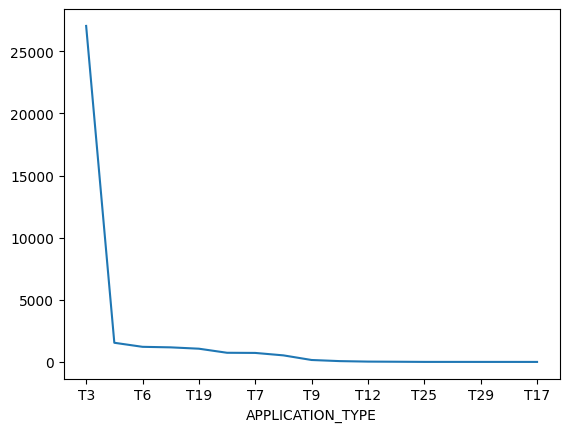

In [25]:
application_df.APPLICATION_TYPE.value_counts().plot()

In [26]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_count= application_df['APPLICATION_TYPE'].value_counts()
print(application_type_count)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [27]:
# Choose a cutoff value and create a list of application types to be replaced
cutoff_value = 500

# Get the count of unique values in the 'APPLICATION_TYPE' column
value_counts = application_df['APPLICATION_TYPE'].value_counts()

# Create a list of application types that appear less than the cutoff value
application_types_to_replace = value_counts[value_counts < cutoff_value].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

# Check to make sure the replacement was successful
print(application_df['APPLICATION_TYPE'].value_counts())


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64


<Axes: xlabel='CLASSIFICATION'>

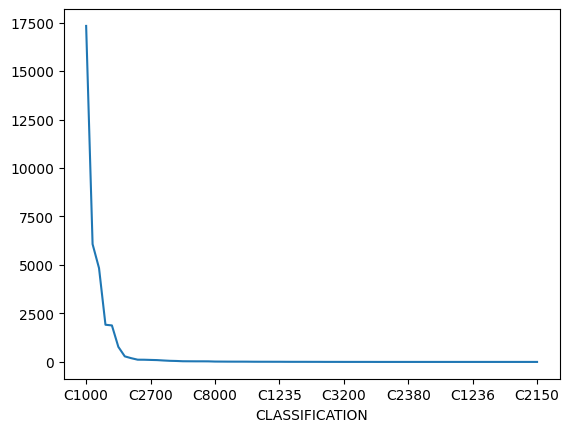

In [28]:
application_df.CLASSIFICATION.value_counts().plot()

In [29]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_count= application_df['CLASSIFICATION'].value_counts()
print(classification_count)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C6100        1
C1820        1
C1900        1
C2150        1
Name: count, Length: 71, dtype: int64


In [30]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count= application_df['CLASSIFICATION'].value_counts()
classification_count_more_than_1 = classification_count.loc[classification_count > 1]
print(classification_count_more_than_1)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1238       10
C1278       10
C1237        9
C1235        9
C7210        7
C1720        6
C2400        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1256        2
C1246        2
C1234        2
C1267        2
Name: count, dtype: int64


In [31]:
# Choose a cutoff value and create a list of classifications to be replaced
cutoff_value = 1000
# use the variable name `classifications_to_replace`
# Get the count of unique values in the 'APPLICATION_TYPE' column
value_counts = application_df['CLASSIFICATION'].value_counts()

# Create a list of application types that appear less than the cutoff value
classifications_to_replace = value_counts[value_counts < cutoff_value].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
print(application_df['CLASSIFICATION'].value_counts())


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64


<Axes: xlabel='NAME'>

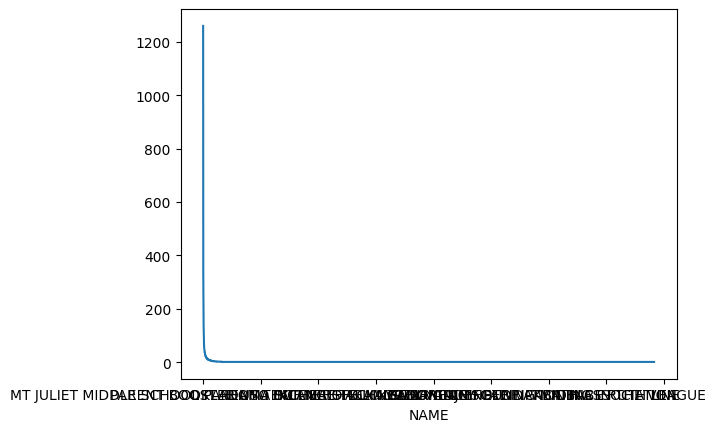

In [32]:
application_df.NAME.value_counts().plot()

In [34]:
print(application_df.NAME.value_counts().head(20))

NAME
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCI

In [37]:
# Choose a cutoff value and create a list of NAMES to be replaced
# use the variable name `names_to_replace`
cutoff = 100

# Count occurrences
name_counts = application_df.NAME.value_counts()

# Vectorized replacement: Replace names with low counts
application_df['NAME'] = np.where(application_df['NAME'].isin(name_counts[name_counts < cutoff].index), "Other", application_df['NAME'])

# Check result
print(application_df['NAME'].value_counts())

NAME
Other                                                                 25987
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CL

In [38]:
application_df.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [39]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features
numeric_features = ['ASK_AMT'] # select the numerical columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features
binary_features = ['STATUS', 'SPECIAL_CONSIDERATIONS']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric, binary and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [40]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(application_df).toarray()

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = numeric_features + binary_features + list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features))

application_df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
application_df_final["IS_SUCCESSFUL"] = application_df.IS_SUCCESSFUL # TARGET
application_df_final.head()

,ASK_AMT,STATUS,SPECIAL_CONSIDERATIONS,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,NAME_CIVITAN INTERNATIONAL,NAME_DEMOLAY INTERNATIONAL,NAME_FARMERS EDUCATIONAL AND COOPERATIVE UNION OF AMERICA,NAME_HABITAT FOR HUMANITY INTERNATIONAL INC,NAME_HONOR SOCIETY OF PHI KAPPA PHI,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_INTERNATIONAL ASSOCIATION OF SHEET METAL AIR RAIL & TRANSPORTATION,NAME_KNIGHTS OF COLUMBUS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOMS CLUB,NAME_MONTANA 4-H FOUNDATION INC,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_PTA UTAH CONGRESS,NAME_SERTOMA INC,NAME_SIGMA BETA DELTA INC,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TENNESSEE ORDER OF THE EASTERN STAR,NAME_THE UNITED STATES PONY CLUBS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_UNIVERSITY OF WYOMING,NAME_VETERANS OF FOREIGN WARS OF THE UNITED STATES AUXILIARY,NAME_WASHINGTON STATE GRANGE,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,IS_SUCCESSFUL
0,-0.031725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.030536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-0.031725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-0.031706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.030146,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [41]:
corrs = application_df_final.corr()
abs(corrs.IS_SUCCESSFUL).sort_values(ascending=False)

,IS_SUCCESSFUL
IS_SUCCESSFUL,1.000000
AFFILIATION_CompanySponsored,0.369379
AFFILIATION_Independent,0.368322
NAME_Other,0.349970
ORGANIZATION_Association,0.179561
...,...
AFFILIATION_Family/Parent,0.002608
NAME_MONTANA 4-H FOUNDATION INC,0.002062
STATUS,0.001636
APPLICATION_TYPE_T3,0.000953


In [43]:
# Step 1: Get the Data
X = application_df.drop(columns=["IS_SUCCESSFUL"])
y = application_df.IS_SUCCESSFUL

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify ensures same % of the target classes in the train/test

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(34299, 10)
(25724, 10)
(8575, 10)


In [44]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)

    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix:
    [[ 7478  4550]
 [ 2064 11632]]

    AUC: 0.8100639068128417

    Classification Report:
                  precision    recall  f1-score   support

           0       0.78      0.62      0.69     12028
           1       0.72      0.85      0.78     13696

    accuracy                           0.74     25724
   macro avg       0.75      0.74      0.74     25724
weighted avg       0.75      0.74      0.74     25724

    
TEST METRICS
    Confusion Matrix:
    [[2413 1597]
 [ 712 3853]]

    AUC: 0.8046426649695586

    Classification Report:
                  precision    recall  f1-score   support

           0       0.77      0.60      0.68      4010
           1       0.71      0.84      0.77      4565

    accuracy                           0.73      8575
   macro avg       0.74      0.72      0.72      8575
weighted avg       0.74      0.73      0.73      8575

    


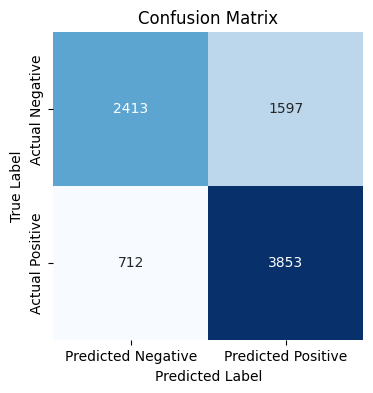

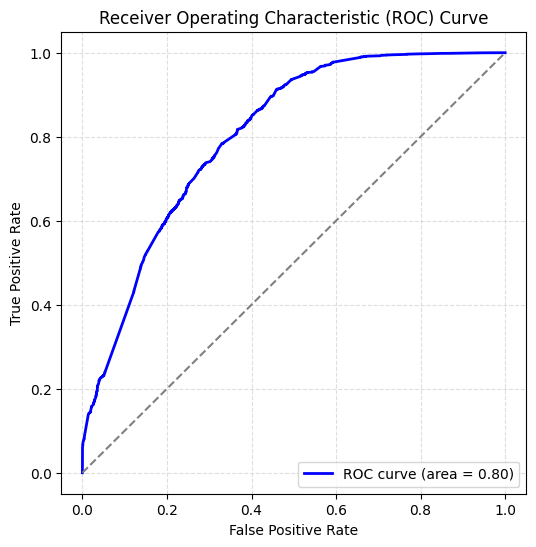

In [45]:
 # Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 8985  3043]
 [  958 12738]]

    AUC: 0.9069828596980877

    Classification Report:
                  precision    recall  f1-score   support

           0       0.90      0.75      0.82     12028
           1       0.81      0.93      0.86     13696

    accuracy                           0.84     25724
   macro avg       0.86      0.84      0.84     25724
weighted avg       0.85      0.84      0.84     25724

    
TEST METRICS
    Confusion Matrix:
    [[2510 1500]
 [ 764 3801]]

    AUC: 0.797367998404864

    Classification Report:
                  precision    recall  f1-score   support

           0       0.77      0.63      0.69      4010
           1       0.72      0.83      0.77      4565

    accuracy                           0.74      8575
   macro avg       0.74      0.73      0.73      8575
weighted avg       0.74      0.74      0.73      8575

    


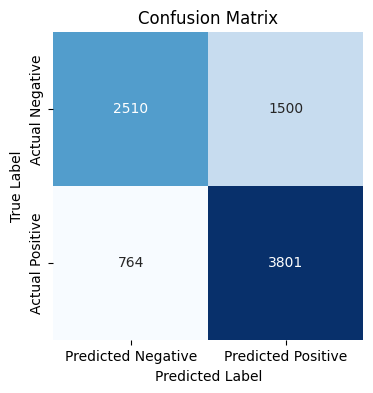

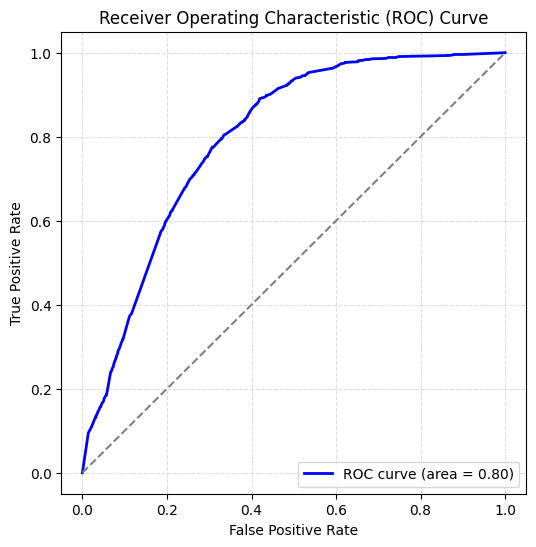

In [46]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 7586  4442]
 [ 1359 12337]]

    AUC: 0.8440219511171752

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.63      0.72     12028
           1       0.74      0.90      0.81     13696

    accuracy                           0.77     25724
   macro avg       0.79      0.77      0.77     25724
weighted avg       0.79      0.77      0.77     25724

    
TEST METRICS
    Confusion Matrix:
    [[2404 1606]
 [ 543 4022]]

    AUC: 0.8175916998303802

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.60      0.69      4010
           1       0.71      0.88      0.79      4565

    accuracy                           0.75      8575
   macro avg       0.77      0.74      0.74      8575
weighted avg       0.76      0.75      0.74      8575

    


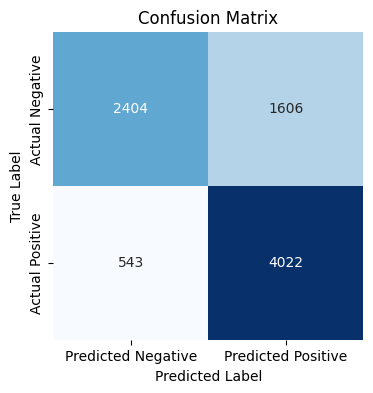

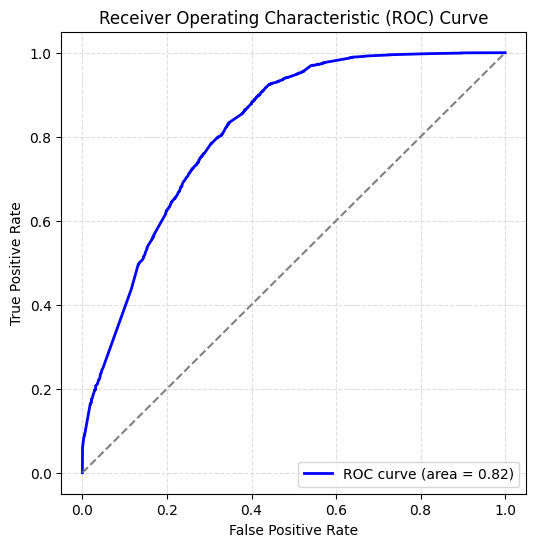

In [47]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix:
    [[ 7606  4422]
 [ 1483 12213]]

    AUC: 0.8395374134564131

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.63      0.72     12028
           1       0.73      0.89      0.81     13696

    accuracy                           0.77     25724
   macro avg       0.79      0.76      0.76     25724
weighted avg       0.78      0.77      0.77     25724

    
TEST METRICS
    Confusion Matrix:
    [[2407 1603]
 [ 537 4028]]

    AUC: 0.8196305239092848

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.60      0.69      4010
           1       0.72      0.88      0.79      4565

    accuracy                           0.75      8575
   macro avg       0.77      0.74      0.74      8575
weighted avg       0.76      0.75      0.74      8575

    


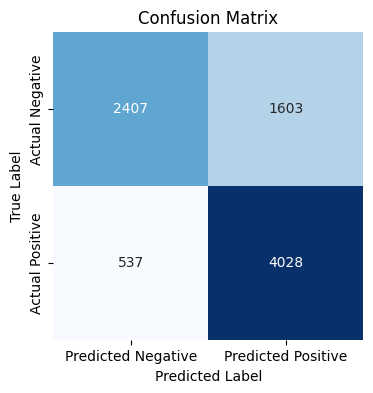

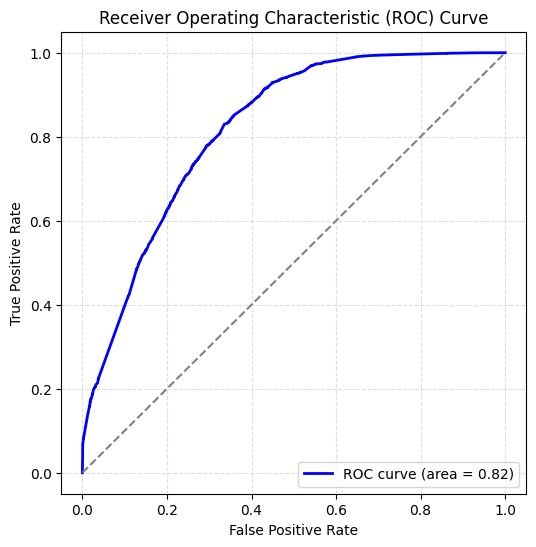

In [48]:
 # Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)